In [2]:
%matplotlib inline


# View Watershed Characterisitics Using StreamStats


## Import Packages
To get started, download the necessary Python packages. The ``GeoPandas``
package is an open source project that assists in working with geospatial data
in Python. Learn more about
`GeoPandas <https://geopandas.org/gallery/index.html>`_.



In [1]:
import streamstats
import geopandas as gpd

## Indentify watershed
To identify a HUC, use a latitude and longitude value to select a specific watershed.
Assign cordinates to variables ``lat`` and ``lon``. Using StreamStat's data,
assign location to a variable that will represent the
delineated watershed using the USGS StreamStats API.



In [3]:
lat, lon = 45.237884, -118.456295
ws = streamstats.Watershed(lat=lat, lon=lon)

## Find the Hydrologic Unit Code (HUC) of the watershed
The USGS delineates watershed using a series of numbers based a hierarchal
region system. Every watershed is assigned a series of numbers called the
hydrological unit code (HUC). StreamStats uses HUC to identify and delineate
watersheds. `Learn more <https://water.usgs.gov/GIS/huc.html>`_ about
Hydrologic Units . The ``ws.huc`` function will return the HUC of the
identified watershed.



In [4]:
ws.huc

'1706'

## Find Characteristics of the watershed
The function ``ws.characteristics()`` will return the available basin
characteristics for the identified watershed.In order to return information
on a specific characteristic, use function
``ws.get_characteristic('StatLabel')``. `Learn more <https://streamstatsags.cr.usgs.gov/ss_defs/basin_char_defs.aspx>`_
about StreamStats Basin Characteristic Definitions.



In [5]:
# Available characteristics
ws.characteristics

# Specific characteristics
ws.get_characteristic('DRNAREA')

{'ID': 0,
 'name': 'Drainage Area',
 'description': 'Area that drains to a point on a stream',
 'code': 'DRNAREA',
 'unit': 'square miles',
 'value': 86.5}

In [6]:
ws.boundary
ws.boundary['crs']

{'type': 'ESPG', 'properties': {'code': 4326}}

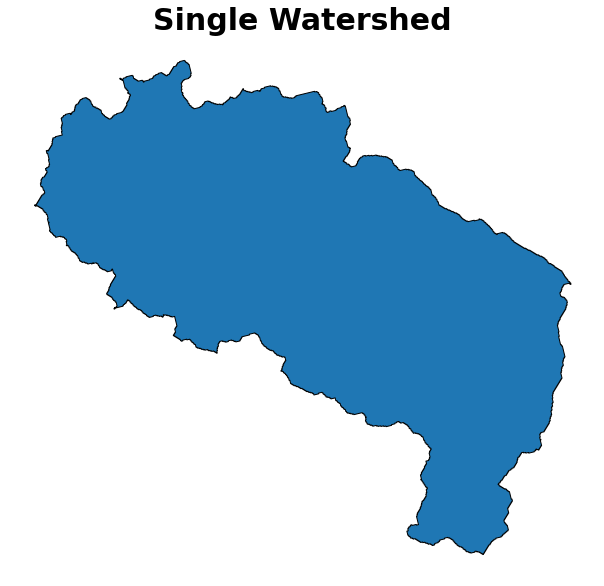

In [7]:
ws.boundary
poly = gpd.GeoDataFrame.from_features(ws.boundary["features"], crs="EPSG:4326")
ax = poly.plot(figsize=(20, 10), edgecolor='k')
ax.set_title("Single Watershed", fontsize=30, fontweight = 'bold')
ax.set_axis_off()